In [215]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [216]:
df = pd.read_json('C:/Users/User/Desktop/Apresentação para ifood/Spotify/Spotify/StreamingHistory.json')
df.head()

,endTime,artistName,trackName,msPlayed
0,2020-07-20 02:13,Aura Lumin,Nature Ambient,0
1,2020-07-20 02:15,Aura Lumin,Nature Ambient,95910
2,2020-07-20 02:16,Aura Lumin,the Light,43381
3,2020-07-20 02:24,Aura Lumin,Destiny,236592
4,2020-07-20 07:02,Neewton,Dawn,64349


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     415 non-null    object
 1   artistName  415 non-null    object
 2   trackName   415 non-null    object
 3   msPlayed    415 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 13.1+ KB


In [218]:
# Alterando para datetime a coluna endtime e convertendo no horario(brasil UTC-03:00)  
df['endTime'] = pd.to_datetime(df['endTime'])

# Criando as colunas Ano,Mês, dia e dia da semana
df['Ano'], df['Mês'] = df['endTime'].dt.year, df['endTime'].dt.month_name()
df['Dia'] = df['endTime'].dt.day
df['hour'] = df['endTime'].dt.hour
df['Dia da Semana'] = df['endTime'].dt.day_name()
df['tempo'] = df['endTime'].dt.time
df['horas'] = df['endTime'].dt.hour
df['nomeDia'] = df['endTime'].map( lambda x: x.day_name())

In [219]:
df['tempo_Escutado(hr)'] = df['msPlayed']/3600000
df['tempo_Escutado(min)'] = df['msPlayed']/60000

In [220]:
df.head()

,endTime,artistName,trackName,msPlayed,Ano,Mês,Dia,hour,Dia da Semana,tempo,horas,nomeDia,tempo_Escutado(hr),tempo_Escutado(min)
0,2020-07-20 02:13:00,Aura Lumin,Nature Ambient,0,2020,July,20,2,Monday,02:13:00,2,Monday,0.000000,0.000000
1,2020-07-20 02:15:00,Aura Lumin,Nature Ambient,95910,2020,July,20,2,Monday,02:15:00,2,Monday,0.026642,1.598500
2,2020-07-20 02:16:00,Aura Lumin,the Light,43381,2020,July,20,2,Monday,02:16:00,2,Monday,0.012050,0.723017
3,2020-07-20 02:24:00,Aura Lumin,Destiny,236592,2020,July,20,2,Monday,02:24:00,2,Monday,0.065720,3.943200
4,2020-07-20 07:02:00,Neewton,Dawn,64349,2020,July,20,7,Monday,07:02:00,7,Monday,0.017875,1.072483


In [221]:
def Parte_do_dia(x):
    if (x >= 6) and (x < 12):
        return 'Manhã'
    elif (x >= 12) and (x < 18):
        return 'Tarde'
    elif (x > 18) and (x < 23):
        return 'Noite'
    else:
        return 'Madrugada'

df['Parte do dia'] = df['endTime'].dt.hour.apply(Parte_do_dia)

In [222]:
df.head()

,endTime,artistName,trackName,msPlayed,Ano,Mês,Dia,hour,Dia da Semana,tempo,horas,nomeDia,tempo_Escutado(hr),tempo_Escutado(min),Parte do dia
0,2020-07-20 02:13:00,Aura Lumin,Nature Ambient,0,2020,July,20,2,Monday,02:13:00,2,Monday,0.000000,0.000000,Madrugada
1,2020-07-20 02:15:00,Aura Lumin,Nature Ambient,95910,2020,July,20,2,Monday,02:15:00,2,Monday,0.026642,1.598500,Madrugada
2,2020-07-20 02:16:00,Aura Lumin,the Light,43381,2020,July,20,2,Monday,02:16:00,2,Monday,0.012050,0.723017,Madrugada
3,2020-07-20 02:24:00,Aura Lumin,Destiny,236592,2020,July,20,2,Monday,02:24:00,2,Monday,0.065720,3.943200,Madrugada
4,2020-07-20 07:02:00,Neewton,Dawn,64349,2020,July,20,7,Monday,07:02:00,7,Monday,0.017875,1.072483,Manhã


In [223]:
df['Dia da Semana'] = df['Dia da Semana'].map({'Monday':'Segunda-feira',
                             'Tuesday':'Terça-feira',
                             'Wednesday':'Quarta-feira',
                             'Thursday' : 'Quinta-feira',
                             'Friday' : 'Sexta-feira',
                             'Saturday' : 'Sábado',               
                             'Sunday' : 'Domingo',            
                             np.nan:'NY'},
                             na_action=None)

In [224]:
df['Mês'] = df['Mês'].map({'May' : 'Maio',               
                             'July' : 'Julho',                
                             np.nan:'NY'},
                             na_action=None)

In [225]:
df.head(2)

,endTime,artistName,trackName,msPlayed,Ano,Mês,Dia,hour,Dia da Semana,tempo,horas,nomeDia,tempo_Escutado(hr),tempo_Escutado(min),Parte do dia
0,2020-07-20 02:13:00,Aura Lumin,Nature Ambient,0,2020,Julho,20,2,Segunda-feira,02:13:00,2,Monday,0.000000,0.0000,Madrugada
1,2020-07-20 02:15:00,Aura Lumin,Nature Ambient,95910,2020,Julho,20,2,Segunda-feira,02:15:00,2,Monday,0.026642,1.5985,Madrugada


In [226]:
df = df.drop(columns=['hour','nomeDia'])
df.head()

,endTime,artistName,trackName,msPlayed,Ano,Mês,Dia,Dia da Semana,tempo,horas,tempo_Escutado(hr),tempo_Escutado(min),Parte do dia
0,2020-07-20 02:13:00,Aura Lumin,Nature Ambient,0,2020,Julho,20,Segunda-feira,02:13:00,2,0.000000,0.000000,Madrugada
1,2020-07-20 02:15:00,Aura Lumin,Nature Ambient,95910,2020,Julho,20,Segunda-feira,02:15:00,2,0.026642,1.598500,Madrugada
2,2020-07-20 02:16:00,Aura Lumin,the Light,43381,2020,Julho,20,Segunda-feira,02:16:00,2,0.012050,0.723017,Madrugada
3,2020-07-20 02:24:00,Aura Lumin,Destiny,236592,2020,Julho,20,Segunda-feira,02:24:00,2,0.065720,3.943200,Madrugada
4,2020-07-20 07:02:00,Neewton,Dawn,64349,2020,Julho,20,Segunda-feira,07:02:00,7,0.017875,1.072483,Manhã


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   endTime              415 non-null    datetime64[ns]
 1   artistName           415 non-null    object        
 2   trackName            415 non-null    object        
 3   msPlayed             415 non-null    int64         
 4   Ano                  415 non-null    int64         
 5   Mês                  415 non-null    object        
 6   Dia                  415 non-null    int64         
 7   Dia da Semana        415 non-null    object        
 8   tempo                415 non-null    object        
 9   horas                415 non-null    int64         
 10  tempo_Escutado(hr)   415 non-null    float64       
 11  tempo_Escutado(min)  415 non-null    float64       
 12  Parte do dia         415 non-null    object        
dtypes: datetime64[ns](1), float64(2), i

In [228]:
df.dtypes

endTime                datetime64[ns]
artistName                     object
trackName                      object
msPlayed                        int64
Ano                             int64
Mês                            object
Dia                             int64
Dia da Semana                  object
tempo                          object
horas                           int64
tempo_Escutado(hr)            float64
tempo_Escutado(min)           float64
Parte do dia                   object
dtype: object

In [229]:
df.describe()

,msPlayed,Ano,Dia,horas,tempo_Escutado(hr),tempo_Escutado(min)
count,4.150000e+02,415.000000,415.000000,415.000000,415.000000,415.000000
mean,1.727517e+05,2020.971084,11.737349,16.578313,0.047987,2.879195
std,1.608005e+05,0.167772,5.213410,6.664711,0.044667,2.680009
min,0.000000e+00,2020.000000,1.000000,0.000000,0.000000,0.000000
25%,5.750950e+04,2021.000000,8.000000,14.500000,0.015975,0.958492
50%,1.813020e+05,2021.000000,13.000000,18.000000,0.050362,3.021700
75%,2.277335e+05,2021.000000,16.000000,22.000000,0.063259,3.795558
max,2.064664e+06,2021.000000,21.000000,23.000000,0.573518,34.411067


In [230]:
# Tempo escutado em horas

df['tempo_Escutado(hr)'].sum()

19.914434166666666

In [231]:
# Tempo escutado em minutos

df['tempo_Escutado(min)'].sum()

1194.86605

In [232]:
minutos = df['tempo_Escutado(min)'].sum()
horas = minutos/60
dias = horas/24
print('{} dias {} horas e {} minutos'.format(int(dias), 
                                int(horas)-24*int(dias),
                                int(minutos)-60*(24*int(dias) + (int(horas)-24*int(dias)))
                                ))

0 dias 19 horas e 54 minutos


In [233]:
df.head()

,endTime,artistName,trackName,msPlayed,Ano,Mês,Dia,Dia da Semana,tempo,horas,tempo_Escutado(hr),tempo_Escutado(min),Parte do dia
0,2020-07-20 02:13:00,Aura Lumin,Nature Ambient,0,2020,Julho,20,Segunda-feira,02:13:00,2,0.000000,0.000000,Madrugada
1,2020-07-20 02:15:00,Aura Lumin,Nature Ambient,95910,2020,Julho,20,Segunda-feira,02:15:00,2,0.026642,1.598500,Madrugada
2,2020-07-20 02:16:00,Aura Lumin,the Light,43381,2020,Julho,20,Segunda-feira,02:16:00,2,0.012050,0.723017,Madrugada
3,2020-07-20 02:24:00,Aura Lumin,Destiny,236592,2020,Julho,20,Segunda-feira,02:24:00,2,0.065720,3.943200,Madrugada
4,2020-07-20 07:02:00,Neewton,Dawn,64349,2020,Julho,20,Segunda-feira,07:02:00,7,0.017875,1.072483,Manhã


<AxesSubplot:ylabel='Dia da Semana'>

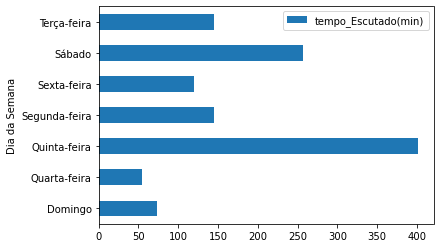

In [234]:
# Dia da semana (em minutos) que mais escutei spotify

df.groupby(['Dia da Semana']).agg({'tempo_Escutado(min)':'sum'}).plot(kind='barh')

<AxesSubplot:ylabel='Dia da Semana'>

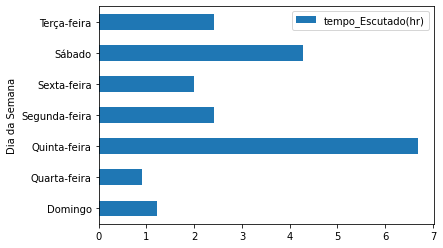

In [235]:
# Dia da semana (em horas) que mais escutei spotify

df.groupby(['Dia da Semana']).agg({'tempo_Escutado(hr)':'sum'}).plot(kind='barh')

In [236]:
df['Ano'].value_counts()

2021    403
2020     12
Name: Ano, dtype: int64

<AxesSubplot:>

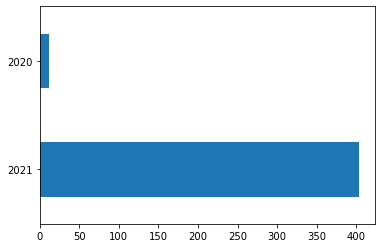

In [237]:
# Ano que mais utilizei o spotify

df['Ano'].value_counts().plot.barh()

In [238]:
df.groupby(['Mês']).agg({'Ano':'sum'})

,Ano
Mês,
Julho,826577
Maio,12126


In [239]:
df['Mês'].value_counts()

Julho    409
Maio       6
Name: Mês, dtype: int64

<AxesSubplot:>

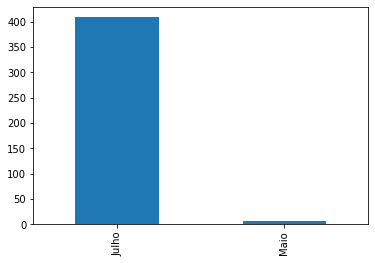

In [240]:
df['Mês'].value_counts().plot.bar()

In [241]:
df['artistName'].value_counts().head(10)

Vintage Culture    67
RÜFÜS DU SOL       21
Dubdogz            20
Elderbrook         12
Mochakk            10
Dashdot             9
Koradize            9
Cherub              9
VINNE               9
Sono                9
Name: artistName, dtype: int64

<AxesSubplot:>

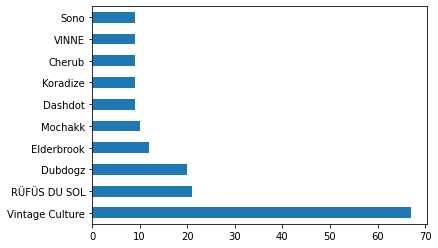

In [242]:
df['artistName'].value_counts().head(10).plot.barh()

In [243]:
df['trackName'].value_counts().head(10)

Pumped up Kicks (feat. Joy Corporation)                    11
Sometimes                                                  11
Losing - Remix                                             11
In The Dark                                                10
I Will Find                                                 9
Baile da Roosevelt (Pam Pararam)                            9
Doses & Mimosas                                             9
Keep Control - ARTBAT Remix                                 9
Buttercup                                                   9
Love Tonight - Vintage Culture & Kiko Franco Remix Edit     8
Name: trackName, dtype: int64

<AxesSubplot:>

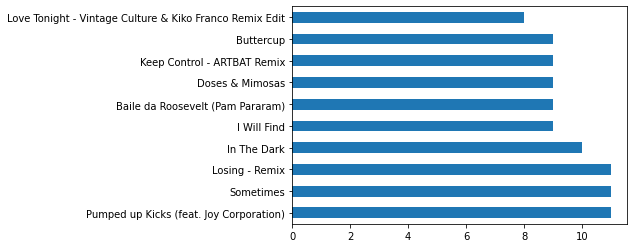

In [244]:
df['trackName'].value_counts().head(10).plot.barh()

<AxesSubplot:>

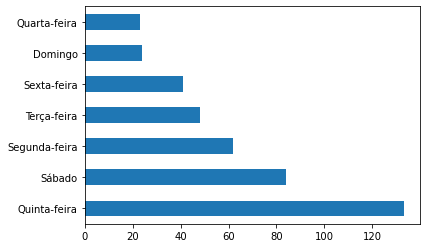

In [245]:
df['Dia da Semana'].value_counts().head(10).plot.barh()

<AxesSubplot:>

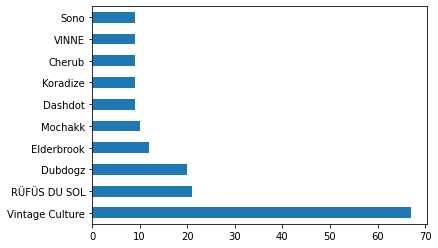

In [246]:
df['artistName'].value_counts().head(10).plot.barh()

In [247]:
df['Parte do dia'].value_counts().head(10)

Noite        162
Tarde        132
Madrugada    117
Manhã          4
Name: Parte do dia, dtype: int64

<AxesSubplot:>

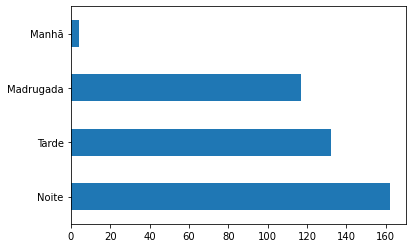

In [248]:
df['Parte do dia'].value_counts().head(10).plot.barh()

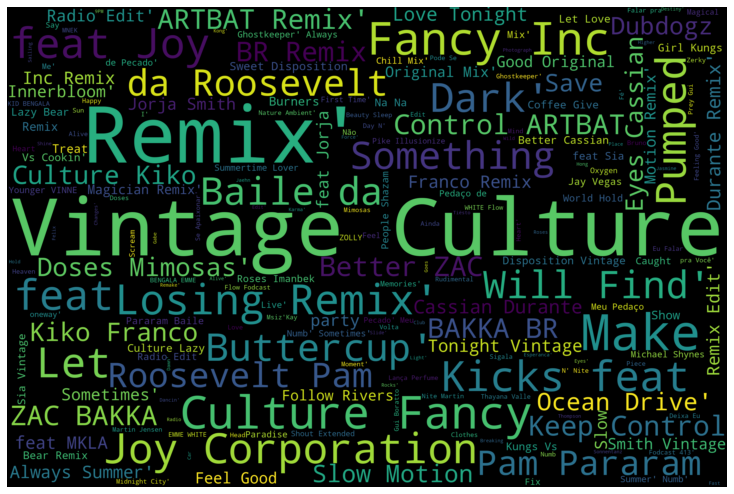

In [249]:
#nuvem de palavras das musicas
text = df.trackName.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

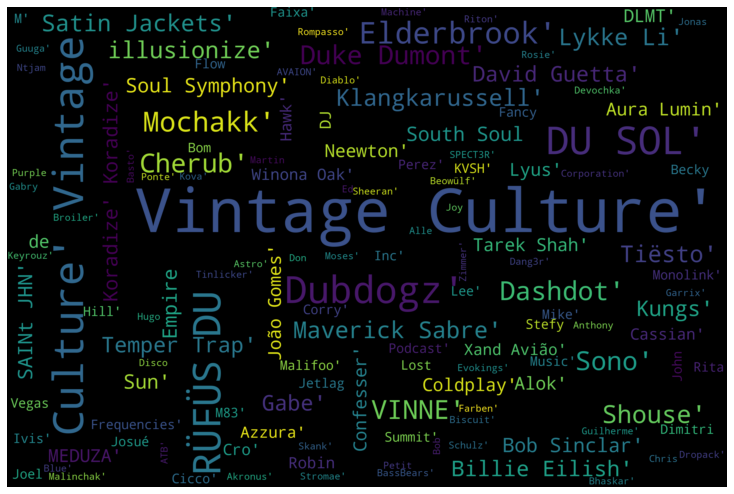

In [250]:
#nuvem de palavras das musicas
text = df.artistName.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (10, 20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [251]:
df.head(2)

,endTime,artistName,trackName,msPlayed,Ano,Mês,Dia,Dia da Semana,tempo,horas,tempo_Escutado(hr),tempo_Escutado(min),Parte do dia
0,2020-07-20 02:13:00,Aura Lumin,Nature Ambient,0,2020,Julho,20,Segunda-feira,02:13:00,2,0.000000,0.0000,Madrugada
1,2020-07-20 02:15:00,Aura Lumin,Nature Ambient,95910,2020,Julho,20,Segunda-feira,02:15:00,2,0.026642,1.5985,Madrugada


In [252]:
df.to_csv('APRESENTAÇÃO IFOOD/dados_SPOTIFY.csv', index=False)